# Esercitazione 10
2 - 5 Maggio 2023

### Codice EquazioniNormali
Implementare la function  **eqnorm(A,b)** che implementa il metodo delle equazioni normali per la soluzione del sistema sovradeterminato Ax=b e che prende in input:
- la matrice A di dimensione $m \times n$ , $m>n$
- il termine noto b di ordine m
restituisce in output
- la soluzione del sistema lineare 

In [5]:
import numpy as np
import RisolviSis as rs
import scipy.linalg as scl

In [6]:
def eqnorm(A,b):
    AT = A.T
    G = AT@A
    L = scl.cholesky(G, lower = True)
    LT = L.T
    y = AT@b
    z, flag = rs.Lsolve(L, y)
    x, flag = rs.Usolve(LT, z)
    return x

### Codice QRLS
Implementare la function  **qrLS(A,b)** che utilizza il metodo QR per la soluzione del sistema sovradeterminato Ax=b e che prende in input:
- la matrice A di dimensione $m \times n$ , $m>n$
- il termine noto b di ordine m
restituisce in output
- la soluzione del sistema lineare e la norma 2 al quadrato del residuo.

In [30]:
def qrLS(A,b):
    Q,R = scl.qr(A)
    QT = Q.T
    h = QT@b
    n = np.shape(A[0])
    x, flag = rs.Usolve(R[0:n, :], h[0:n])
    hnorm = np.square(scl.norm(h[n:]))     #norma 2 al quadrato del residuo
    return x, hnorm

### Codice SVDLS
Implementare la function  **svdLS(A,b)** che utilizza  il metodo SVD per la soluzione del sistema sovradeterminato Ax=b e che prende in input:
- la matrice A di dimensione $m \times n$ , $m>n$
- il termine noto b di ordine m
restituisce in output
- la soluzione del sistema lineare e la norma 2 al quadrato del residuo.

## Esercizio 1
- Si utilizzino i tre metodi implementati  per l'approssimazione ai minimi quadrati delle seguenti configurazioni di dati:

$$
\begin{array}{l}
x_1 = [-3.5, \, -3, \, -2, \, -1.5, \, -0.5, \, 0.5, \, 1.7, \, 2.5, \, 3] ;\\
y_1 = [-3.9, \, -4.8, \, -3.3, \, -2.5, \, 0.3, \, 1.8, \, 4, \, 6.9, \, 7.1] ;\\
x_2 = [-3.14, \, -2.4, \, -1.57, \, -0.7, \, -0.3, \, 0, \, 0.4, \, 0.7, \, 1.57] ;\\
y_2 = [0.02, \, -1, \, -0.9, \, -0.72, \, -0.2, \, -0.04, \, 0.65, \, 0.67, \, 1.1] ;\\
x_3 = [[1.001,\, 1.004,\, 1.005,\,1.0012, \,1.0013,  \, 1.0014,  \, 1.0015, \, 1.0016] ;\\
y_3 = [-1.2, \, -0.95, \, -0.9, \, -1.15, \, -1.1, \, -1] ;\\
\end{array}
$$

al variare del grado $n$ tra 1 e 4.



In [14]:
import matplotlib.pyplot as plt

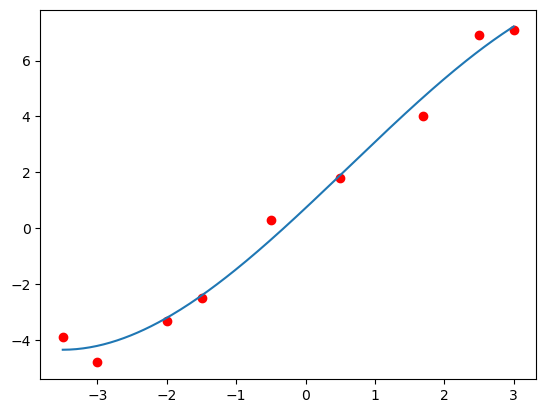

1.8874817726480202


In [31]:
x1 = np.array([-3.5, -3, -2, -1.5, -0.5, 0.5, 1.7, 2.5, 3])
y1 = np.array([-3.9, -4.8, -3.3, -2.5, 0.3, 1.8, 4, 6.9, 7.1])
m = np.shape(x1[0])
n = 3    #grado del polinomio di regressione
n1 = n + 1   #gradi di libertà del polinomio
B = np.vander(x1, increasing = True)[:, :n1]
a = eqnorm(B, y1)
xv = np.linspace(np.min(x1), np.max(x1), 200)
pol = np.polyval(np.flip(a), xv)
plt.plot(x1,y1,'ro',xv,pol)
plt.show()
err = scl.norm(np.polyval(np.flip(a),x1)-y1)**2
print(err)

## Esercizio 2: 
Per i dati $(x_i, y_i)$ riportati nei seguenti array

$$
\begin{array}{l}
x = [0.0004, \, 0.2507, \, 0.5008, \, 2.0007, \, 8.0013]  ;\\
y = [0.0007, \, 0.0162, \, 0.0288, \, 0.0309, \, 0.0310] ;
\end{array}
$$

- costruire la retta di regressione;
- costruire la parabola approssimante i dati nel senso dei minimi quadrati;

Quale tra le due approssimazioni risulta la migliore? (Confrontare i grafici e la norma euclidea al quadrato del vettore dei residui).



## Esercizio 3:
Scrivere uno script Python per approssimare la seguente configurazione di punti

$$
\begin{array}{l}
x = [10 \, : \, 0.5/5 \, : \, 10.5] ;\\
y = [11.0320, \, 11.1263, \, 11.1339, \, 11.1339, \, 11.1993, \, 11.1844] ;
\end{array}
$$

mediante un polinomio ai minimi quadrati di grado 4 costruito  con il metodo
delle equazioni normali, con il metodo QRLS e con il metodo SVDLS.
Perturbare poi il secondo punto nel seguente modo
$$x(1) = x(1) + 0.013; \quad y(1) = y(1) - 0.001;$$
e calcolare i polinomi ai minimi quadrati relativi alla
configurazione perturbata. Commentare e motivare i risultati ottenuti.

